In [4]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import statsmodels.api as sm

In [5]:
df = pd.read_csv('salary_data_cleaned.csv')

In [6]:
df.columns

Index(['Job Title', 'Salary Estimate', 'Job Description', 'Rating',
       'Company Name', 'Location', 'Headquarters', 'Size', 'Founded',
       'Type of ownership', 'Industry', 'Sector', 'Revenue', 'Competitors',
       'title', 'level', 'hourly', 'min_salary', 'max_salary', 'avg_salary',
       'tech_python', 'tech_java', 'tech_R', 'tech_spark', 'tech_aws',
       'tech_excel', 'len_description', 'bins_rating', 'state_location',
       'state_headquarters', 'job_in_headquarters', 'age', 'num_competitors'],
      dtype='object')

In [11]:

df_model = df[['avg_salary','bins_rating','Size','Type of ownership','Industry','Sector','Revenue','num_competitors','hourly',
             'state_location','job_in_headquarters','age','tech_python','tech_spark','tech_aws','tech_excel','tech_R', 'tech_java','title','level','len_description']]


In [12]:
df_model = df_model.replace('Unknown', -1)

In [13]:

df_1hot_encode = pd.get_dummies(df_model, drop_first=True)


In [14]:
list(df_1hot_encode.columns)

['avg_salary',
 'num_competitors',
 'hourly',
 'job_in_headquarters',
 'age',
 'tech_python',
 'tech_spark',
 'tech_aws',
 'tech_excel',
 'tech_R',
 'tech_java',
 'len_description',
 'bins_rating_low',
 'bins_rating_medium',
 'bins_rating_other',
 'Size_-1',
 'Size_1 to 50 employees',
 'Size_10000+ employees',
 'Size_1001 to 5000 employees',
 'Size_201 to 500 employees',
 'Size_5001 to 10000 employees',
 'Size_501 to 1000 employees',
 'Size_51 to 200 employees',
 'Type of ownership_College / University',
 'Type of ownership_Company - Private',
 'Type of ownership_Company - Public',
 'Type of ownership_Government',
 'Type of ownership_Hospital',
 'Type of ownership_Nonprofit Organization',
 'Type of ownership_Other Organization',
 'Type of ownership_School / School District',
 'Type of ownership_Subsidiary or Business Segment',
 'Industry_Accounting',
 'Industry_Advertising & Marketing',
 'Industry_Aerospace & Defense',
 'Industry_Architectural & Engineering Services',
 'Industry_Auctio

In [15]:

# train test split 


X = df_1hot_encode.drop('avg_salary', axis =1)
y = df_1hot_encode.avg_salary.values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [16]:


X_sm = X = sm.add_constant(X)
model = sm.OLS(y,X_sm)
model.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.690
Model:                            OLS   Adj. R-squared:                  0.614
Method:                 Least Squares   F-statistic:                     9.134
Date:                Sun, 22 Aug 2021   Prob (F-statistic):           4.31e-86
Time:                        23:03:08   Log-Likelihood:                -3310.1
No. Observations:                 742   AIC:                             6912.
Df Residuals:                     596   BIC:                             7585.
Df Model:                         145                                         
Covariance Type:            nonrobust                                         
=====================================================================================================================
                                                        coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------------------
const                                                44.9497     38.015      1.182      0.238     -29.710     119.610
num_competitors                                       2.0188      0.878      2.300      0.022       0.295       3.742
hourly                                              -16.6050      9.203     -1.804      0.072     -34.680       1.470
job_in_headquarters                                   2.4803      2.634      0.942      0.347      -2.693       7.654
age                                                   0.0050      0.030      0.165      0.869      -0.054       0.064
tech_python                                           7.6542      2.643      2.896      0.004       2.463      12.846
tech_spark                                            0.7447      2.928      0.254      0.799      -5.006       6.496
tech_aws                                             -0.5324      2.788     -0.191      0.849      -6.008       4.943
tech_excel                                           -0.3190      3.447     -0.093      0.926      -7.090       6.452
tech_R                                               18.0973     22.873      0.791      0.429     -26.823      63.018
tech_java                                             1.4791      3.338      0.443      0.658      -5.077       8.035
len_description                                      -0.0004      0.001     -0.496      0.620      -0.002       0.001
bins_rating_low                                     -14.6683      4.629     -3.169      0.002     -23.760      -5.576
bins_rating_medium                                   -5.8662      2.747     -2.136      0.033     -11.260      -0.472
bins_rating_other                                    24.4340     17.555      1.392      0.164     -10.044      58.912
Size_-1                                              -1.4493     20.259     -0.072      0.943     -41.238      38.339
Size_1 to 50 employees                              -30.4826     16.096     -1.894      0.059     -62.095       1.130
Size_10000+ employees                               -36.2762     15.883     -2.284      0.023     -67.469      -5.084
Size_1001 to 5000 employees                         -24.6825     15.045     -1.641      0.101     -54.230       4.865
Size_201 to 500 employees                           -28.6283     14.802     -1.934      0.054     -57.699       0.442
Size_5001 to 10000 employees                        -33.8634     15.781     -2.146      0.032     -64.856      -2.870
Size_501 to 1000 employees                          -28.1583     15.053     -1.871      0.062     -57.721       1.405
Size_51 to 200 employees                            -26.9907     15.125     -1.785      0.075     -56.695       2.714
Type of ownersh

In [17]:

from sklearn.linear_model import LinearRegression, Lasso
from sklearn.model_selection import cross_val_score

lm = LinearRegression()
lm.fit(X_train, y_train)

np.mean(cross_val_score(lm,X_train,y_train, scoring = 'neg_mean_absolute_error', cv= 3))



-20.364478771691292

,alpha,error
9,0.1,-19.517084


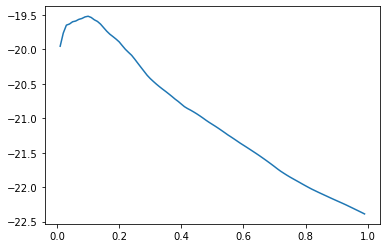

In [18]:
# lasso regression 
lm_l = Lasso(alpha=.13)
lm_l.fit(X_train,y_train)
np.mean(cross_val_score(lm_l,X_train,y_train, scoring = 'neg_mean_absolute_error', cv= 3))

alpha = []
error = []

for i in range(1,100):
    alpha.append(i/100)
    lml = Lasso(alpha=(i/100))
    error.append(np.mean(cross_val_score(lml,X_train,y_train, scoring = 'neg_mean_absolute_error', cv= 3)))
    
plt.plot(alpha,error)

err = tuple(zip(alpha,error))
df_err = pd.DataFrame(err, columns = ['alpha','error'])
df_err[df_err.error == max(df_err.error)] 

In [19]:

# random forest 
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor()

np.mean(cross_val_score(rf,X_train,y_train,scoring = 'neg_mean_absolute_error', cv= 3))

# tune models GridsearchCV 
from sklearn.model_selection import GridSearchCV
parameters = {'n_estimators':range(10,300,10), 'criterion':('mse','mae'), 'max_features':('auto','sqrt','log2')}

gs = GridSearchCV(rf,parameters,scoring='neg_mean_absolute_error',cv=3)
gs.fit(X_train,y_train)

gs.best_score_
gs.best_estimator_



RandomForestRegressor(n_estimators=90)

In [20]:
# test ensembles 
tpred_lm = lm.predict(X_test)
tpred_lml = lm_l.predict(X_test)
tpred_rf = gs.best_estimator_.predict(X_test)

from sklearn.metrics import mean_absolute_error
mean_absolute_error(y_test,tpred_lm)
mean_absolute_error(y_test,tpred_lml)
mean_absolute_error(y_test,tpred_rf)

mean_absolute_error(y_test,(tpred_lm+tpred_rf)/2)

14.745469999120287